<a href="https://colab.research.google.com/github/aditi-ravishankar/Fake-News-Detection/blob/main/FAKE_NEWS_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FAKE NEWS DETECTION - Aditi Ravishankar

### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk

### Reading the dataset

In [ ]:
data_df=pd.read_csv("news.csv")
data_df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
data_df.drop("Unnamed: 0",axis=1,inplace=True)
data_df.head(10)

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [ ]:
data_df.count()

title    6335
text     6335
label    6335
dtype: int64

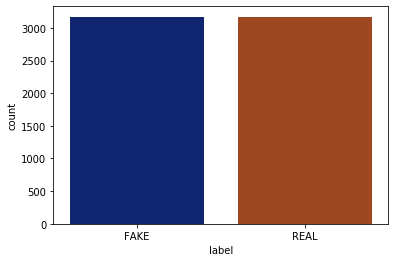

In [ ]:
sns.countplot(x ='label', data = data_df)

In [ ]:
data_df.groupby('label').count()

,title,text
label,,
FAKE,3164,3164
REAL,3171,3171


The count of the news pieces under both FAKE and REAL classes are nearly equal

### Removing Punctuations


In [ ]:
import string
def pun(txt):
    punctuation_removed="".join([c for c in txt if c not in string.punctuation])
    return punctuation_removed

In [ ]:
data_df['text']=data_df['text'].apply(lambda x: pun(x))

In [ ]:
data_df.head()

,title,text,label
0,You Can Smell Hillary’s Fear,Daniel Greenfield a Shillman Journalism Fellow...,FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,US Secretary of State John F Kerry said Monday...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,— Kaydee King KaydeeKing November 9 2016 The l...,FAKE
4,The Battle of New York: Why This Primary Matters,Its primary day in New York and frontrunners H...,REAL


### Tokenizing the text

In [ ]:
from nltk.tokenize import word_tokenize
data_df['text_tokenized']=data_df['text'].apply(lambda x: word_tokenize(x))
data_df.head()

,title,text,label,text_tokenized
0,You Can Smell Hillary’s Fear,Daniel Greenfield a Shillman Journalism Fellow...,FAKE,"[Daniel, Greenfield, a, Shillman, Journalism, ..."
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,"[Google, Pinterest, Digg, Linkedin, Reddit, St..."
2,Kerry to go to Paris in gesture of sympathy,US Secretary of State John F Kerry said Monday...,REAL,"[US, Secretary, of, State, John, F, Kerry, sai..."
3,Bernie supporters on Twitter erupt in anger ag...,— Kaydee King KaydeeKing November 9 2016 The l...,FAKE,"[—, Kaydee, King, KaydeeKing, November, 9, 201..."
4,The Battle of New York: Why This Primary Matters,Its primary day in New York and frontrunners H...,REAL,"[Its, primary, day, in, New, York, and, frontr..."


### Text Normalization

In [ ]:
def to_lowercase(words):
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

In [ ]:
data_df['text_after_normalization']=data_df['text_tokenized'].apply(lambda x: to_lowercase(x))
data_df.head(5)

,title,text,label,text_tokenized,text_after_normalization
0,You Can Smell Hillary’s Fear,Daniel Greenfield a Shillman Journalism Fellow...,FAKE,"[Daniel, Greenfield, a, Shillman, Journalism, ...","[daniel, greenfield, a, shillman, journalism, ..."
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,"[Google, Pinterest, Digg, Linkedin, Reddit, St...","[google, pinterest, digg, linkedin, reddit, st..."
2,Kerry to go to Paris in gesture of sympathy,US Secretary of State John F Kerry said Monday...,REAL,"[US, Secretary, of, State, John, F, Kerry, sai...","[us, secretary, of, state, john, f, kerry, sai..."
3,Bernie supporters on Twitter erupt in anger ag...,— Kaydee King KaydeeKing November 9 2016 The l...,FAKE,"[—, Kaydee, King, KaydeeKing, November, 9, 201...","[—, kaydee, king, kaydeeking, november, 9, 201..."
4,The Battle of New York: Why This Primary Matters,Its primary day in New York and frontrunners H...,REAL,"[Its, primary, day, in, New, York, and, frontr...","[its, primary, day, in, new, york, and, frontr..."


In [ ]:
def remove_quotes(words):
    pun=['“',"’",'”']
    new_words = []
    for word in words:
        if word not in pun:
            new_words.append(word)    
    return new_words

In [ ]:
data_df['text_after_normalization']=data_df['text_after_normalization'].apply(lambda x: remove_quotes(x))
data_df.head(5)

,title,text,label,text_tokenized,text_after_normalization
0,You Can Smell Hillary’s Fear,Daniel Greenfield a Shillman Journalism Fellow...,FAKE,"[Daniel, Greenfield, a, Shillman, Journalism, ...","[daniel, greenfield, a, shillman, journalism, ..."
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,"[Google, Pinterest, Digg, Linkedin, Reddit, St...","[google, pinterest, digg, linkedin, reddit, st..."
2,Kerry to go to Paris in gesture of sympathy,US Secretary of State John F Kerry said Monday...,REAL,"[US, Secretary, of, State, John, F, Kerry, sai...","[us, secretary, of, state, john, f, kerry, sai..."
3,Bernie supporters on Twitter erupt in anger ag...,— Kaydee King KaydeeKing November 9 2016 The l...,FAKE,"[—, Kaydee, King, KaydeeKing, November, 9, 201...","[—, kaydee, king, kaydeeking, november, 9, 201..."
4,The Battle of New York: Why This Primary Matters,Its primary day in New York and frontrunners H...,REAL,"[Its, primary, day, in, New, York, and, frontr...","[its, primary, day, in, new, york, and, frontr..."


### Removing Stopwords

In [ ]:
sw=nltk.corpus.stopwords.words('english')
def remove_stopwords(txt):
    removed=[word for word in txt if word not in sw]
    return removed
data_df['after_removing_stopwords']=data_df['text_after_normalization'].apply(lambda x: remove_stopwords(x))
data_df.head()

,title,text,label,text_tokenized,text_after_normalization,after_removing_stopwords
0,You Can Smell Hillary’s Fear,Daniel Greenfield a Shillman Journalism Fellow...,FAKE,"[Daniel, Greenfield, a, Shillman, Journalism, ...","[daniel, greenfield, a, shillman, journalism, ...","[daniel, greenfield, shillman, journalism, fel..."
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,"[Google, Pinterest, Digg, Linkedin, Reddit, St...","[google, pinterest, digg, linkedin, reddit, st...","[google, pinterest, digg, linkedin, reddit, st..."
2,Kerry to go to Paris in gesture of sympathy,US Secretary of State John F Kerry said Monday...,REAL,"[US, Secretary, of, State, John, F, Kerry, sai...","[us, secretary, of, state, john, f, kerry, sai...","[us, secretary, state, john, f, kerry, said, m..."
3,Bernie supporters on Twitter erupt in anger ag...,— Kaydee King KaydeeKing November 9 2016 The l...,FAKE,"[—, Kaydee, King, KaydeeKing, November, 9, 201...","[—, kaydee, king, kaydeeking, november, 9, 201...","[—, kaydee, king, kaydeeking, november, 9, 201..."
4,The Battle of New York: Why This Primary Matters,Its primary day in New York and frontrunners H...,REAL,"[Its, primary, day, in, New, York, and, frontr...","[its, primary, day, in, new, york, and, frontr...","[primary, day, new, york, frontrunners, hillar..."


### Lemmatization of text

In [ ]:
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet

def lemmatization(txt):
    def get_wordnet_pos(word):
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}

        return tag_dict.get(tag, wordnet.NOUN)
    lemmatizer = WordNetLemmatizer()
    lemmas=[]
    for word in txt:
        lemma = lemmatizer.lemmatize(word, get_wordnet_pos(word))                          
        lemmas.append(lemma)
                
    return lemmas


In [ ]:
data_df['after_lemmatization']=data_df['after_removing_stopwords'].apply(lambda x: lemmatization(x))
data_df.head()

,title,text,label,text_tokenized,text_after_normalization,after_removing_stopwords,after_lemmatization
0,You Can Smell Hillary’s Fear,Daniel Greenfield a Shillman Journalism Fellow...,FAKE,"[Daniel, Greenfield, a, Shillman, Journalism, ...","[daniel, greenfield, a, shillman, journalism, ...","[daniel, greenfield, shillman, journalism, fel...","[daniel, greenfield, shillman, journalism, fel..."
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,"[Google, Pinterest, Digg, Linkedin, Reddit, St...","[google, pinterest, digg, linkedin, reddit, st...","[google, pinterest, digg, linkedin, reddit, st...","[google, pinterest, digg, linkedin, reddit, st..."
2,Kerry to go to Paris in gesture of sympathy,US Secretary of State John F Kerry said Monday...,REAL,"[US, Secretary, of, State, John, F, Kerry, sai...","[us, secretary, of, state, john, f, kerry, sai...","[us, secretary, state, john, f, kerry, said, m...","[u, secretary, state, john, f, kerry, say, mon..."
3,Bernie supporters on Twitter erupt in anger ag...,— Kaydee King KaydeeKing November 9 2016 The l...,FAKE,"[—, Kaydee, King, KaydeeKing, November, 9, 201...","[—, kaydee, king, kaydeeking, november, 9, 201...","[—, kaydee, king, kaydeeking, november, 9, 201...","[—, kaydee, king, kaydeeking, november, 9, 201..."
4,The Battle of New York: Why This Primary Matters,Its primary day in New York and frontrunners H...,REAL,"[Its, primary, day, in, New, York, and, frontr...","[its, primary, day, in, new, york, and, frontr...","[primary, day, new, york, frontrunners, hillar...","[primary, day, new, york, frontrunners, hillar..."


In [ ]:
fake=data_df[data_df.label == 'FAKE']
text_fake = [' '.join(text) for text in fake['after_lemmatization']]
final_text_fake =' '.join(text_fake)
final_text_fake[:1000]

'daniel greenfield shillman journalism fellow freedom center new york writer focus radical islam final stretch election hillary rodham clinton go war fbi word unprecedented thrown around often election ought retire still unprecedented nominee major political party go war fbi exactly hillary people do coma patient wake watch hour cnn hospital bed would assume fbi director james comey hillary opponent election fbi attack everyone obama cnn hillary people circulate letter attack comey currently medium hit piece lambast target trump surprising clinton ally start run attack ad fbi fbi leadership warn entire leftwing establishment form lynch mob continue go hillary fbi credibility attack medium democrat preemptively head result investigation clinton foundation hillary clinton covert struggle fbi agent obama doj people go explosively public new york time compare comey j edgar hoover bizarre headline james comey role recall hoover fbi fairly practically admits front spout nonsense boston globe

### Word Cloud to visualize the most frequent words in the fake news

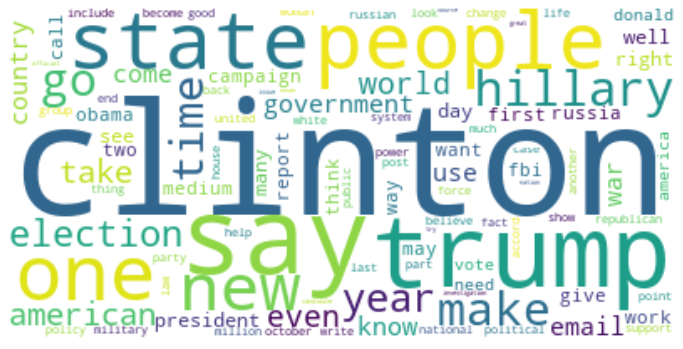

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud_fake = WordCloud(max_font_size=100, max_words=100,background_color="white",collocations=False).generate(final_text_fake)
plt.figure(figsize = (12,12))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
real=data_df[data_df.label == 'REAL']
text_real = ["".join(text) for text in real['after_lemmatization']]
final_text_real = "".join(text_real)

### Word Cloud to visualize the most frequent words in the real news

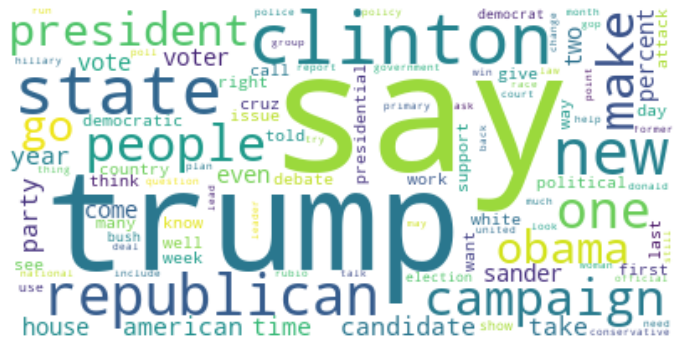

In [ ]:
wordcloud_real = WordCloud(max_font_size=100, max_words=100,background_color="white",collocations=False).generate(final_text_real)
plt.figure(figsize = (12,12))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis("off")
plt.show()

### Barplot to visualize unigram frequency

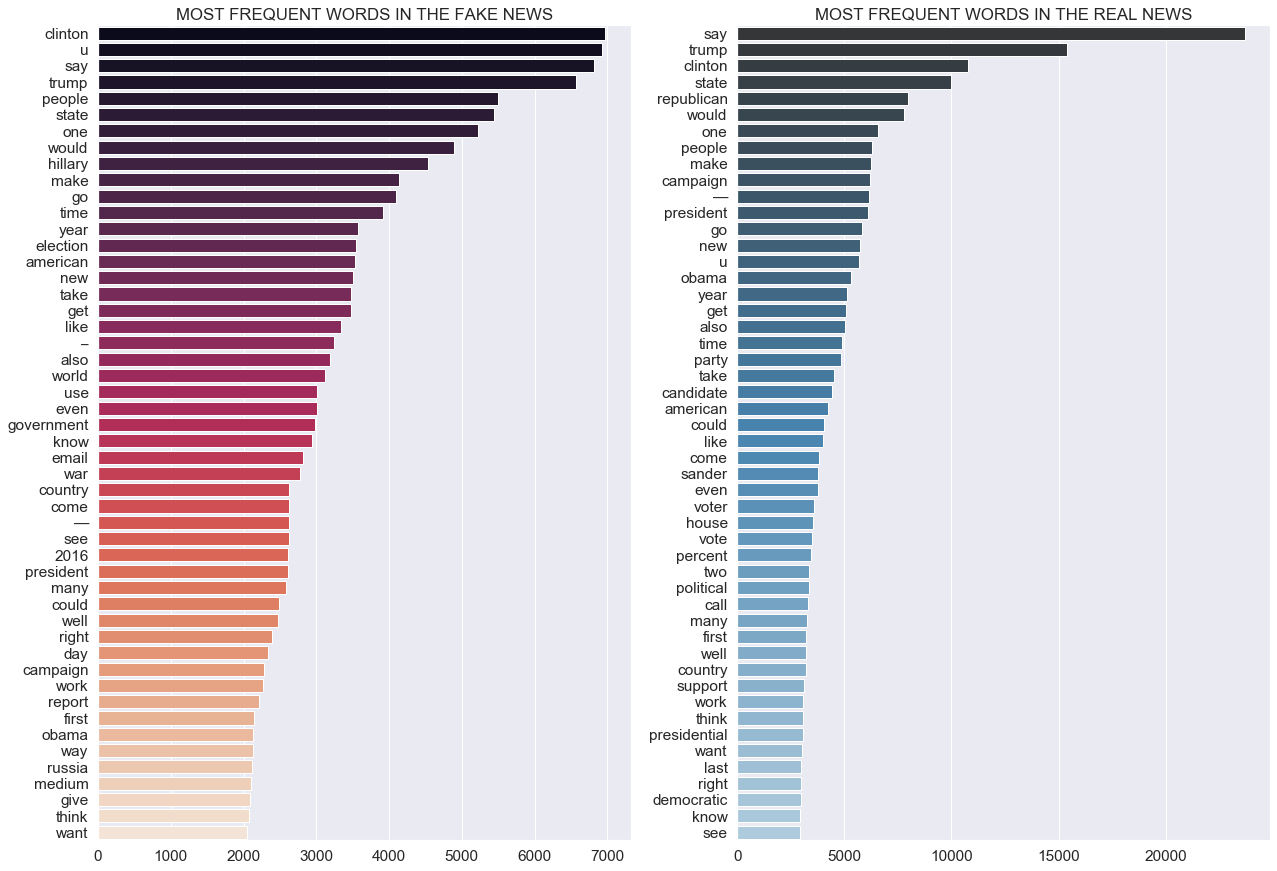

In [ ]:
import collections
counter1=collections.Counter(final_text_fake.split())
most1=counter1.most_common()
counter2=collections.Counter(final_text_real.split())
most2=counter2.most_common()
x1, y1, x2, y2= [], [], [], []
for word,count in most1[:50]:
    x1.append(word)
    y1.append(count)
for word,count in most2[:50]:
    x2.append(word)
    y2.append(count)
plt.figure(figsize=(21,15))
plt.subplot(1, 2, 1)
plt.title('MOST FREQUENT WORDS IN THE FAKE NEWS')
sns.barplot(x=y1,y=x1,palette="rocket")
plt.subplot(1, 2, 2)
plt.title('MOST FREQUENT WORDS IN THE REAL NEWS')
sns.barplot(x=y2,y=x2,palette="Blues_d")

In [ ]:
data_df['after_lemmatization']=data_df['after_lemmatization'].apply(lambda x: " ".join(x))
df=data_df[['title','after_lemmatization','label']].copy()
df.head()

,title,after_lemmatization,label
0,You Can Smell Hillary’s Fear,daniel greenfield shillman journalism fellow f...,FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,google pinterest digg linkedin reddit stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,u secretary state john f kerry say monday stop...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,— kaydee king kaydeeking november 9 2016 lesso...,FAKE
4,The Battle of New York: Why This Primary Matters,primary day new york frontrunners hillary clin...,REAL


### TF-IDF Vectorization and splitting the dataset

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
tr_x,tx,tr_y,ty=train_test_split(df.after_lemmatization,df.label,test_size=0.3,random_state=0)
tfidf=TfidfVectorizer()
X_tfidf=tfidf.fit_transform(df.after_lemmatization)
X_train,X_test,y_train,y_test=train_test_split(X_tfidf,df.label,test_size=0.3,random_state=0)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import cross_val_score

### Cross validation to select the best classification model

In [ ]:
clf1=MultinomialNB()
clf2=svm.SVC(kernel='linear',C=1)
clf3=LogisticRegression(solver='lbfgs')
clf4=RandomForestClassifier(n_estimators=100)
clf=[clf1,clf2,clf3,clf4]
modelname=['Naive Bayes','Linear SVM','Logistic Regression','Random Forest Classifier']
scr=[]
for c in clf:
    score=cross_val_score(c,X_tfidf,df.label,cv=10,scoring='accuracy').mean()
    scr.append(score)
dict = {'Model': modelname, 'Accuracy score': scr}
cvs = pd.DataFrame(dict)
cvs

,Model,Accuracy score
0,Naive Bayes,0.829045
1,Linear SVM,0.940173
2,Logistic Regression,0.919338
3,Random Forest Classifier,0.905447


### Support Vector Machine Classifier using Linear kernel

In [ ]:
from sklearn.svm import SVC
sv=SVC(kernel='linear',C=1)
sv.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
predicted1 = sv.predict(X_test)
print('Accuracy : ',accuracy_score(y_test,predicted1))
print(metrics.classification_report(y_test,predicted1))
conf1 = confusion_matrix(y_test,predicted1)
conf1

Accuracy :  0.929510783798001
              precision    recall  f1-score   support

        FAKE       0.92      0.93      0.93       933
        REAL       0.93      0.93      0.93       968

    accuracy                           0.93      1901
   macro avg       0.93      0.93      0.93      1901
weighted avg       0.93      0.93      0.93      1901



array([[870,  63],
       [ 71, 897]])

### Hyperparameter tuning using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = sv,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [ ]:
accuracy = grid_search.best_score_
accuracy

0.9395579612088408

In [ ]:
grid_search.best_params_

{'C': 10, 'gamma': 0.3, 'kernel': 'rbf'}

### Support Vector Machine classifier using Radial Basis Function Kernel

In [ ]:
classifier = SVC(kernel = 'rbf',C=10,gamma=0.3)
classifier.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
predicted2 = classifier.predict(X_test)
print('Accuracy : ',accuracy_score(y_test,predicted2))
print(metrics.classification_report(y_test,predicted2))
conf2 = confusion_matrix(y_test,predicted2)
conf2

Accuracy :  0.9326670173592846
              precision    recall  f1-score   support

        FAKE       0.93      0.94      0.93       933
        REAL       0.94      0.93      0.93       968

    accuracy                           0.93      1901
   macro avg       0.93      0.93      0.93      1901
weighted avg       0.93      0.93      0.93      1901



array([[875,  58],
       [ 70, 898]])

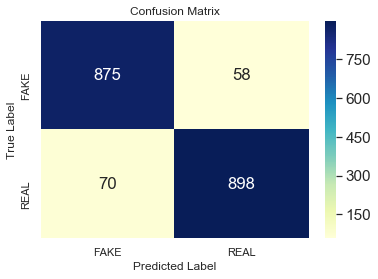

In [ ]:
sns.set(color_codes=True)
plt.figure(1, figsize=(6,4))
plt.title("Confusion Matrix")
sns.set(font_scale=1.4)
ax = sns.heatmap(conf2, annot=True, cmap="YlGnBu",fmt='d')
ax.set_xticklabels(['FAKE','REAL'])
ax.set_yticklabels(['FAKE','REAL'])
ax.set(ylabel="True Label", xlabel="Predicted Label")
plt.show()

In [ ]:
print('Accuracy : ',accuracy_score(y_test,predicted2))

Accuracy :  0.9326670173592846
